In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

import matplotlib.gridspec as gridspec
import xarray as xr
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess

import mtspec

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
from scipy import signal
from scipy.signal import periodogram
import iris

import iris.plot as iplt
import iris.coord_categorisation
from eofs.iris import Eof

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


## Upload files

In [2]:
# Upload observed
file_obs = ('/nfs/see-fs-01_users/mlzp121/ee22kvcs/NOAAERSSTv5_1870_2018_monthly_sst_no_annual_cycle_detrended_regridded.nc')
sst_obs = iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')
cube_obs = iris.load_cube(file_obs,sst_obs)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

In [3]:
#Define constraints to make cubes for SST variables
constraints = [iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'TS'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'THO'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'temp'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')]

In [4]:
# Upload Eoi400 simulations (MP)
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_mp = ['0-200_timeseries_CCSM4Utr','501-1099_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2001-2501_timeseries_HadCM3','1850-2049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '1001-1200_timeseries_NorESML']
MP_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'EOI400.SST.'+names_models_mp[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    MP_models.append(uploaded_cubes)

#print(MP_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

In [5]:
# Upload E280 simulations (PI)
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_pi = ['0-200_timeseries_CCSM4Utr','501-806_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2411-2911_timeseries_HadCM3','2850-3049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '0-200_timeseries_NorESML']
PI_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'E280.SST.'+names_models_pi[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    PI_models.append(uploaded_cubes)

#print(PI_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

## Delimit the region

In [6]:
# Delimt the PDO or North Pacific region for the cube
min_lat = 20.0
max_lat = 70.0
min_lon = 120.0
max_lon = 240.0

# Functions to identify latitudes and longitudes we want to subset to
def pdo_lat(input):
    return min_lat  <= input <= max_lat 
def pdo_lon(input):
    return min_lon  <= input <= max_lon 

pdo_con = iris.Constraint(latitude = pdo_lat, longitude = pdo_lon)

# Subset the cube 
pdo_obs_subset = pdo_con.extract(cube_obs)

pdo_mp_subset = []
for i in MP_models:
    pdo_mp_sub = pdo_con.extract(i)
    pdo_mp_subset.append(pdo_mp_sub)
    
pdo_pi_subset = []
for j in PI_models:
    pdo_pi_sub = pdo_con.extract(j)
    pdo_pi_subset.append(pdo_pi_sub)

## Calculate EOF and PC

In [7]:
## Calculate EOFs for the North Pacific or PDO region
pcs_pdo = []
eof_plot_pdo = []
varF_pdo = []
# The first 7 are for MP and the last 7, for PI

experiments = [pdo_mp_subset, pdo_pi_subset]

for exp in experiments:
    for mod in range(np.size(pdo_mp_subset)):
        # Add bounds
        if not exp[mod].coord('latitude').has_bounds():
            exp[mod].coord('latitude').guess_bounds()
        if not exp[mod].coord('longitude').has_bounds():
            exp[mod].coord('longitude').guess_bounds()
        solver = Eof(exp[mod], weights='area')
        eofs = solver.eofsAsCovariance(neofs=1)
        pcs  = solver.pcs(npcs=1)
        #eigs = solver.eigenvalues(neigs=1)
        varF = solver.varianceFraction(neigs=1)
        eof_std = eofs.collapsed(('eof_number', 'latitude','longitude'), iris.analysis.STD_DEV)
        eof_n = eofs/eof_std
        eof_plot_pdo.append(eof_n)
        pcs_pdo.append(pcs)
        varF_pdo.append(varF)
        
## observed
if not pdo_obs_subset.coord('latitude').has_bounds():
    pdo_obs_subset.coord('latitude').guess_bounds()
if not pdo_obs_subset.coord('longitude').has_bounds():
    pdo_obs_subset.coord('longitude').guess_bounds()
solver = Eof(pdo_obs_subset, weights='area', center=True)
eofs_obs = solver.eofsAsCovariance(neofs=1)
pcs_obs  = solver.pcs(npcs=1)
#eigs = solver.eigenvalues(neigs=1)
varF_obs = solver.varianceFraction(neigs=1)
eof_std_obs = eofs_obs.collapsed(('eof_number', 'latitude','longitude'), iris.analysis.STD_DEV)
eof_pdo_obs = eofs_obs/eof_std_obs

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'eof_number'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully d

In [8]:
# Merge VarF north Pacific and MMM
var_pdo_mp = [varF_pdo[i].data[0] for i in range(7)] + [np.mean([varF_pdo[i].data[0] for i in range(7)])]
var_pdo_pi = [varF_pdo[i].data[0] for i in range(7,14)] + [np.mean([varF_pdo[i].data[0] for i in range(7,14)])] + [varF_obs.data[0]]

In [9]:
### MMM EOF1 and PC1 Pacific
#Means, showing the warm phase
MMM_mp_pdo = (eof_plot_pdo[0][0,:,:].data+eof_plot_pdo[1][0,:,:].data+eof_plot_pdo[2][0,:,:].data+eof_plot_pdo[3][0,:,:].data+eof_plot_pdo[4][0,:,:].data+eof_plot_pdo[5][0,:,:].data+eof_plot_pdo[6][0,:,:].data)/7
MMM_pi_pdo = (eof_plot_pdo[7][0,:,:].data*-1+eof_plot_pdo[8][0,:,:].data+eof_plot_pdo[9][0,:,:].data+eof_plot_pdo[10][0,:,:].data+eof_plot_pdo[11][0,:,:].data*-1+eof_plot_pdo[12][0,:,:].data*-1+eof_plot_pdo[13][0,:,:].data)/7
###
MMM_mp_pc = (pcs_pdo[0][-2376:,0].data+pcs_pdo[1][-2376:,0].data+pcs_pdo[2][-2376:,0].data+pcs_pdo[3][-2376:,0].data+pcs_pdo[4][-2376:,0].data+pcs_pdo[5][-2376:,0].data+pcs_pdo[6][-2376:,0].data)/7
MMM_pi_pc = (pcs_pdo[7][-2400:,0].data*-1+pcs_pdo[8][-2400:,0].data+pcs_pdo[9][-2400:,0].data+pcs_pdo[10][-2400:,0].data+pcs_pdo[11][-2400:,0].data*-1+pcs_pdo[12][-2400:,0].data*-1+pcs_pdo[13][-2400:,0].data)/7

## Convert arrays to iris cubes
MMM_mp_pdo_cube = eof_plot_pdo[1][0,:,:].copy(data = MMM_mp_pdo)
MMM_pi_pdo_cube = eof_plot_pdo[1][0,:,:].copy(data = MMM_pi_pdo)
###
MMM_mp_pc_cube = pcs_pdo[6][:,0].copy(data = MMM_mp_pc)
MMM_pi_pc_cube = pcs_pdo[11][:,0].copy(data = MMM_pi_pc)

In [10]:
## Merge EOFs + MMM EOF for PDO
EOFS_PDO_MP = [eof_plot_pdo[j][0,:,:] for j in range(7)] + [MMM_mp_pdo_cube]
EOFS_PDO_PI = [eof_plot_pdo[j][0,:,:] for j in range(7,14)] + [MMM_pi_pdo_cube] + [eof_pdo_obs[0,:,:]*-1]

In [11]:
### Merge PCs
PC_PDO_MP = [pcs_pdo[j][:,0] for j in range(7)] + [MMM_mp_pc_cube]
PC_PDO_PI = [pcs_pdo[j][:,0] for j in range(7,14)] + [MMM_pi_pc_cube]

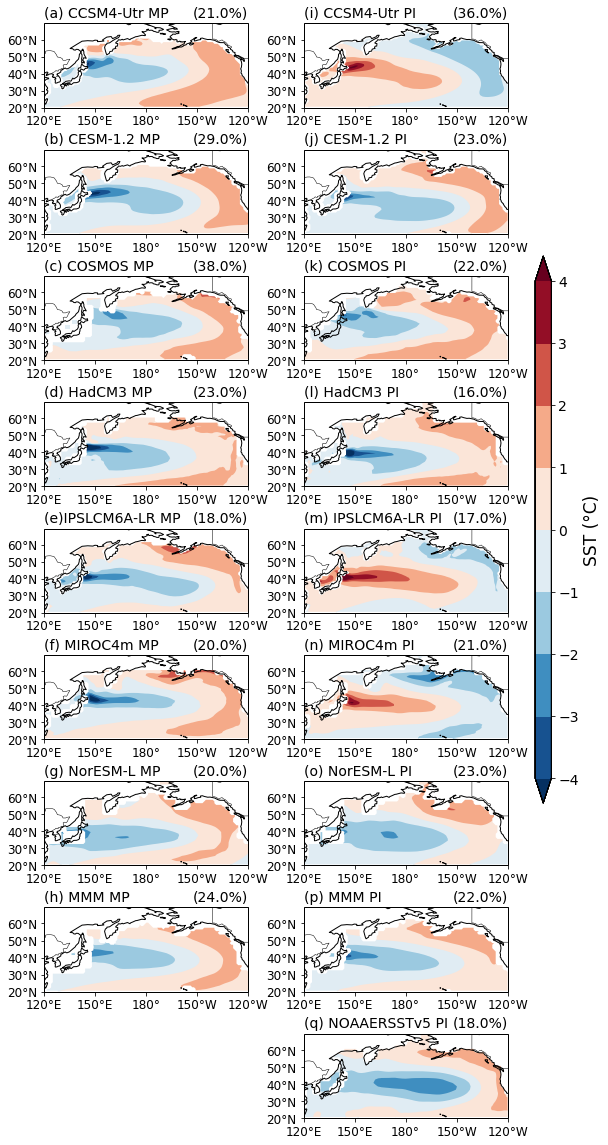

In [12]:
## Test EOF1 plots
all_models1 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
letter1 = ['(a) ','(b) ','(c) ','(d) ','(e)','(f) ', '(g) ', '(h) ']
all_models2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m', 'NorESM-L','MMM', 'NOAAERSSTv5']
letter2 = ['(i) ','(j) ','(k) ','(l) ','(m) ', '(n) ', '(o) ', '(p) ', '(q) ']

fig = plt.figure(figsize=(9, 19))
gs = gridspec.GridSpec(9, 2, width_ratios=[2, 2])  # Define column widths

# Define the axes for the first column (maps)
map_axes1 = []
for i in range(np.size(all_models1)):
    ax = plt.subplot(gs[i, 0], projection=ccrs.PlateCarree(central_longitude=180.0))
    map_axes1.append(ax)

# Define the axes for the second column (maps)
map_axes2 = []
for i in range(np.size(all_models2)):
    ax = plt.subplot(gs[i, 1], projection=ccrs.PlateCarree(central_longitude=180.0))
    map_axes2.append(ax)

## Plot
for (ax, n, l, name) in zip(map_axes1, range(np.size(all_models1)), letter1, all_models1):
    ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5)
    ax.add_feature(cartopy.feature.COASTLINE) 
    
    im = iplt.contourf(EOFS_PDO_MP[n], axes = ax, levels = np.arange(-4,4+1,1), cmap = 'RdBu_r', extend = 'both')
    ax.set_title(l+name+' MP ', fontsize=14, loc='left')
    ax.set_title('('+str(np.round(var_pdo_mp[n] * 100, decimals=0))+'%)', fontsize=14, loc='right')
    
    ax.set_yticks(np.arange(20, 70, 10))
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xticks([120, 150, 180, 210, 240], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E','150°E', '180°', '150°W','120°W'], fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    

for (ax, n, l, name) in zip(map_axes2, range(np.size(all_models2)), letter2, all_models2):
    ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5)
    ax.add_feature(cartopy.feature.COASTLINE)
    
    #if n == 0 or n == 4 or n == 5 :
    #    im = iplt.contourf(EOFS_PDO_PI[n]*-1, axes = ax, levels = np.arange(-4,4+1,1), cmap = 'RdBu_r', extend = 'both')
    #else:
    im = iplt.contourf(EOFS_PDO_PI[n], axes = ax, levels = np.arange(-4,4+1,1), cmap = 'RdBu_r', extend = 'both')
    
    if name == 'NOAA ERSSTv5':
        ax.set_title(l+name, fontsize=14, loc='left')
    else:
        ax.set_title(l+name+' PI', fontsize=14, loc='left')
    ax.set_title('('+str(np.round(var_pdo_pi[n] * 100, decimals=0))+'%)', fontsize=14, loc='right')
        
    ax.set_yticks(np.arange(20, 70, 10))
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xticks([120, 150, 180, 210, 240], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E','150°E', '180°', '150°W','120°W'], fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    
    cbar_ax = fig.add_axes([0.9, 0.33, 0.025, 0.4])#[left, bottom, width, height]
    fig.subplots_adjust(right=0.8)
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
    cbar.ax.tick_params(labelsize=14)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.6)
    cbar.ax.set_ylabel('SST (°C)', size =17)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.000001, hspace=0.5)

#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/Eof1_PDO_patterns_with_obs_MMM_v2.png', bbox_inches = 'tight', dpi=300, format='png')

plt.show()

## Power spectrum

In [13]:
#### MT analysis from Oldeman et al. (2021), https://doi.org/10.5281/zenodo.5718483

def MT_spectrum(time_series, normalise = True, scale = True, trend = None, nbw = 6, ntapers = 10):
    
    # do trend removal and moving average here
    if trend == "linear":
        t = range(len(time_series))
        p = np.polyfit(t, time_series, 1)
        l = t*p[0] + p[1]
        time_series = time_series - l
    
    # Normalise
    if normalise == True:
        time_series = (time_series - np.mean(time_series))/np.std(time_series)
        
    spec, freq = mtspec.mtspec(
                data=time_series, delta=1., time_bandwidth=nbw,
                number_of_tapers=ntapers, statistics=False)
    
    spec = spec[1:freq.argmax()]
    freq = freq[1:freq.argmax()]
    
    # Scale power spectrum on sum (if True)
    if scale == True:
        spec = spec / np.sum(spec)
    
    return freq, spec

In [14]:
## Function for ARMA from Oldeman et al. (2021), https://doi.org/10.5281/zenodo.5718483 
def mc_ar1_ARMA(phi, std, n, N=1000):
    """ Monte-Carlo AR(1) processes
    input:
    phi .. (estimated) lag-1 autocorrelation
    std .. (estimated) standard deviation of noise
    n   .. length of original time series
    N   .. number of MC simulations 
    """
    AR_object = ArmaProcess(np.array([1, -phi]), np.array([1]), nobs=n)
    mc = AR_object.generate_sample(nsample=(N,n), scale=std, axis=1, burnin=1000)
    
    return mc

In [15]:
## Function for CI from Oldeman et al. (2021), https://doi.org/10.5281/zenodo.5718483 

def Confidence_intervals(time_series, normalise=True, scale = True, trend = None, mode = 'FFT', N_surrogates = 1000, nbw = 6, ntapers = 10):
    
    # do trend removal and moving average here
    if trend == "linear":
        t = range(len(time_series))
        p = np.polyfit(t, time_series, 1)
        l = t*p[0] + p[1]
        time_series = time_series - l

    if type(time_series) == xr.core.dataarray.DataArray:
        time_series = time_series.values
    
    # normalise
    if normalise == True:
        time_series = (time_series - np.mean(time_series))/np.std(time_series)

    #First determine the auto-correlation for each time series
    N = 250
    auto_lag  = np.arange(N)
    auto_corr = np.zeros(len(auto_lag))

    for lag_i in range(len(auto_lag)):
        #Determine the auto-correlation
        auto_corr[lag_i] = np.corrcoef(time_series[0:len(time_series)-lag_i], time_series[lag_i:])[0][1]

    #Determine the e-folding time and keep the minimum lag
    e_1 =  np.where(auto_corr < 1.0/np.e)[0][0]

    #Determine the first coefficient for the AR(1) process
    #The auto-lag(1) is equivalent to -1.0/(a - 1)
    a   = -1.0/(e_1) + 1.0 

    #Determine the variance in the time series and the last coefficient for the AR(1) process
    var = np.var(time_series)
#     b   = np.sqrt((1.0 - a**2.0) * var)
    b   = np.sqrt(var)
    
    # generate Monte Carlo sample 
    mc_series = mc_ar1_ARMA(phi=a, std=b, n=len(time_series), N=N_surrogates)
    
    for surrogate_i in range(N_surrogates):
        #Generating surrogate spectra
        
        # select spectrum type
        if mode == 'FFT':
            freq, spec = FFT_spectrum(mc_series[surrogate_i,:], normalise=False, scale=scale)
        elif mode == 'MT':
            freq, spec = MT_spectrum(mc_series[surrogate_i,:], normalise=False, scale=scale, nbw = nbw, ntapers = ntapers)
            
        # create array for spectra    
        if surrogate_i==0: 
            surrogate_spec = np.ma.masked_all((N_surrogates, len(freq)))
        
        # allocate surrogate spectrum
        surrogate_spec[surrogate_i] = spec

    #CI_90 = np.percentile(surrogate_spec, 90, axis = 0)
    CI_95 = np.percentile(surrogate_spec, 95, axis = 0)
    #CI_99 = np.percentile(surrogate_spec, 99, axis = 0)
        
    return CI_95

In [16]:
## Calculate power spectrum in the North Pacific region
#### MMM of MT
mtfreq_pdo_mp, mtfreq_pdo_pi = [], []
mtspec_pdo_mp, mtspec_pdo_pi = [], []
mt_ci95_pdo_mp, mt_ci95_pdo_pi = [], []

for m in range(np.size(PC_PDO_MP)):
    mtfreq_mp_pdo, mtspec_mp_pdo = MT_spectrum(PC_PDO_MP[m].data, normalise= True, scale= True, trend= True)
    mtfreq_pi_pdo, mtspec_pi_pdo = MT_spectrum(PC_PDO_PI[m].data, normalise= True, scale= True, trend= True)
    mt_ci95_mp = Confidence_intervals(PC_PDO_MP[m].data, True, True, "linear", 'MT', 10000) 
    mt_ci95_pi = Confidence_intervals(PC_PDO_PI[m].data, True, True, "linear", 'MT', 10000)
    mtfreq_pdo_mp.append(mtfreq_mp_pdo) 
    mtfreq_pdo_pi.append(mtfreq_pi_pdo) 
    mtspec_pdo_mp.append(mtspec_mp_pdo) 
    mtspec_pdo_pi.append(mtspec_pi_pdo) 
    mt_ci95_pdo_mp.append(mt_ci95_mp)
    mt_ci95_pdo_pi.append(mt_ci95_pi)

In [17]:
## Power spectrum for obs
mtfreq_obs_pdo, mtspec_obs_pdo = MT_spectrum(pcs_obs[:,0].data, normalise= True, scale= True, trend= True)
mt_ci95_obs_pdo = Confidence_intervals(pcs_obs[:,0].data, True, True, "linear", 'MT', 10000)

In [18]:
### Concatenate
### Merge power spec.
all_mtfreq_mp = [*mtfreq_pdo_mp[:8]]
all_mtfreq_pi = [*mtfreq_pdo_pi[:8], mtfreq_obs_pdo]
all_mtspec_mp = [*mtspec_pdo_mp[:8]]
all_mtspec_pi = [*mtspec_pdo_pi[:8], mtspec_obs_pdo]
all_ci95_mp = [*mt_ci95_pdo_mp[:8]]
all_ci95_pi = [*mt_ci95_pdo_pi[:8], mt_ci95_obs_pdo]

## Merge figures of EOF and PC (Figure 3)

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


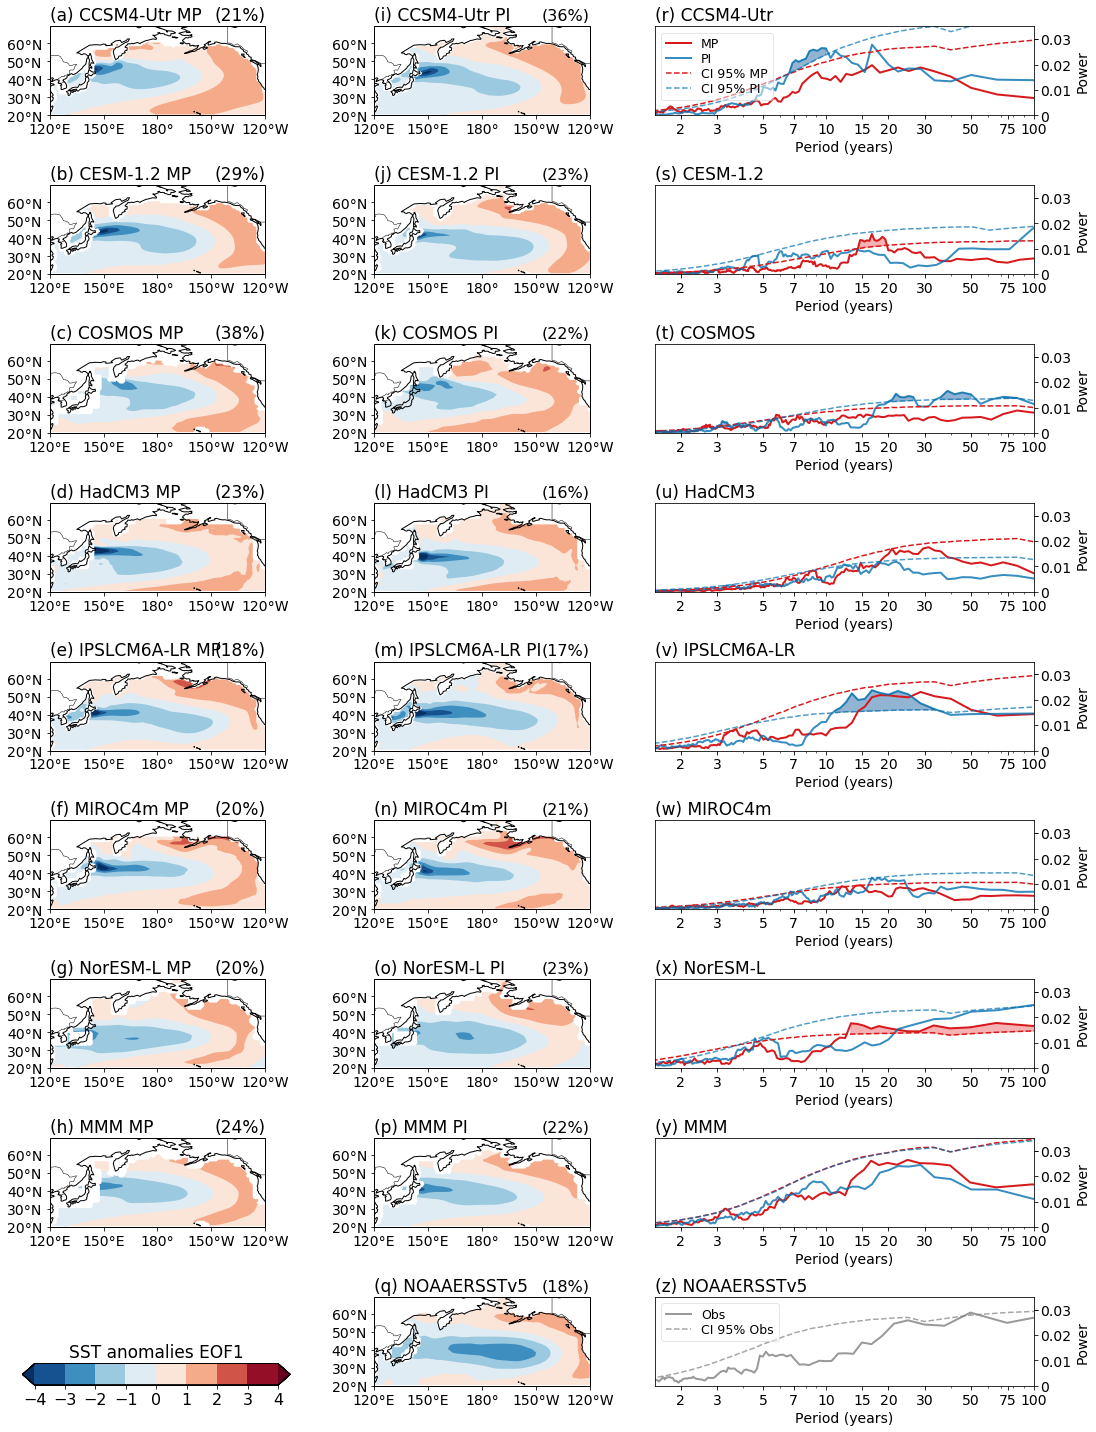

In [19]:
## Plot MP, PI, power spectrum of EOF1
all_models1 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
letter1 = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ', '(g) ', '(h) ']
all_models2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m', 'NorESM-L','MMM', 'NOAAERSSTv5']
letter2 = ['(i) ','(j) ','(k) ','(l) ','(m) ', '(n) ', '(o) ', '(p) ', '(q) ']
letter3 = ['(r) ','(s) ','(t) ','(u) ','(v) ', '(w) ', '(x) ', '(y) ', '(z) ']
#######################
fig = plt.figure(figsize=(15.5, 20))
gs = gridspec.GridSpec(9, 3, width_ratios=[1.6, 1.6, 2])  # Define column widths

# Define the axes for the first column
map_axes1 = []
for i in range(np.size(all_models1)):
    ax = plt.subplot(gs[i, 0], projection=ccrs.PlateCarree(central_longitude=180.0))
    map_axes1.append(ax)

# Define the axes for the second column
map_axes2 = []
for i in range(np.size(all_models2)):
    ax = plt.subplot(gs[i, 1], projection=ccrs.PlateCarree(central_longitude=180.0))
    map_axes2.append(ax)
    
# Define the axes for the third column
plot_axes = []
for i in range(np.size(all_models2)):
    ax = plt.subplot(gs[i, 2])
    plot_axes.append(ax)

### Plot
# First column (MP EOF1)
for (ax, n, l, name) in zip(map_axes1, range(np.size(all_models1)), letter1, all_models1):
    ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5)
    ax.add_feature(cartopy.feature.COASTLINE)

    im = iplt.contourf(EOFS_PDO_MP[n], axes=ax, levels=np.arange(-4, 4+1, 1), cmap='RdBu_r', extend='both')

    ax.set_title(l+name+' MP', fontsize=17, loc='left')
    ax.set_title('('+str(int(np.round(var_pdo_mp[n]*100, decimals=0)))+'%)', fontsize=17, loc='right')

    ax.set_yticks(np.arange(20, 70, 10))
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks([120, 150, 180, 210, 240], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E','150°E', '180°', '150°W','120°W'], fontsize=12)
    ax.tick_params(axis='x', labelsize=14)

# Second column (PI EOF1)
for (ax, n, l, name) in zip(map_axes2, range(np.size(all_models2)), letter2, all_models2):
    ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5)
    ax.add_feature(cartopy.feature.COASTLINE)

    if n == 0 or n == 4 or n == 5 :
        im = iplt.contourf(EOFS_PDO_PI[n]*-1, levels=np.arange(-4, 4+1, 1), axes=ax, cmap='RdBu_r', extend='both')
    else:
        im = iplt.contourf(EOFS_PDO_PI[n], axes=ax, levels=np.arange(-4, 4+1, 1), cmap='RdBu_r', extend='both')

    if name == 'NOAAERSSTv5':
        ax.set_title(l+name, fontsize=17, loc='left')
    else:
        ax.set_title(l+name+' PI', fontsize=17, loc='left')

    ax.set_title('('+str(int(np.round(var_pdo_pi[n]*100, decimals=0)))+'%)', fontsize=16, loc='right')

    ax.set_yticks(np.arange(20, 70, 10))
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks([120, 150, 180, 210, 240], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E','150°E', '180°', '150°W','120°W'], fontsize=12)
    ax.tick_params(axis='x', labelsize=14)
    # Add colorbar
    cbar_ax = fig.add_axes([0.034, 0.035, 0.24, 0.015])  # [left, bottom, width, height]
    
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=16)
    cbar.ax.set_title('SST anomalies EOF1', size=17)
    
# Third column (power spectrum of PC1)
for (ax,n,l,name) in zip(plot_axes, range(np.size(all_models2)), letter3, all_models2):
    
    if n == 8:# observations
        
        ## plot power
        ax.plot(1/(12*all_mtfreq_pi[n]), all_mtspec_pi[n], '-', linewidth = 2, c= 'grey', alpha=0.8, label = 'Obs')
        ## Confidence intervals
        ax.plot(1/(12*all_mtfreq_pi[n]), all_ci95_pi[n], color='grey',linestyle='--', alpha=0.7, linewidth = 1.5, label='CI 95% Obs')
        ## Fill between
        ax.fill_between(1/(12*all_mtfreq_pi[n]), all_mtspec_pi[n], all_ci95_pi[n], where=(all_mtspec_pi[n] > all_ci95_pi[n]), color='gray', alpha=0.6)
       
    else:      
        ### plot power
        ax.plot(1/(12*all_mtfreq_mp[n]), all_mtspec_mp[n], '-', linewidth = 2, c='#d7191c', alpha=1, label = 'MP')
        ax.plot(1/(12*all_mtfreq_pi[n]), all_mtspec_pi[n], '-', linewidth = 2, c= '#0571b0', alpha=0.8, label = 'PI')
        ## Confidence intervals
        ax.plot(1/(12*all_mtfreq_mp[n]), all_ci95_mp[n], color='#d7191c',linestyle='--', linewidth = 1.5, label = 'CI 95% MP')
        ax.plot(1/(12*all_mtfreq_pi[n]), all_ci95_pi[n], color='#0571b0',linestyle='--', alpha=0.7, linewidth = 1.5, label='CI 95% PI')
        ## Fill between
        ax.fill_between(1/(12*all_mtfreq_mp[n]), all_mtspec_mp[n], all_ci95_mp[n], where=(all_mtspec_mp[n] > all_ci95_mp[n]), color='lightcoral', alpha=0.6)
        ax.fill_between(1/(12*all_mtfreq_pi[n]), all_mtspec_pi[n], all_ci95_pi[n], where=(all_mtspec_pi[n] > all_ci95_pi[n]), color='steelblue', alpha=0.6)
    
    ### titles and labels
    ax.set_title(l+name, fontsize=17, loc='left')
    
    ax.set_ylim([0,0.035])
    ax.set_yticks([0,.01,.02,.03,.03])
    ax.set_yticklabels([0,.01,.02,.03], fontsize=14)
    ax.yaxis.tick_right()
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xlabel('Period (years)', size=14)
    ax.set_ylabel('Power', size=14)
    ax.yaxis.set_label_position("right")
    ax.set_xlim([1.5,100])    
    ax.set_xticks([2,3,5,7,10,15,20,30,50,75,100])
    ax.set_xticklabels([2,3,5,7,10,15,20,30,50,75,100],fontsize=14)

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.2,top=0.9,wspace=0.005,hspace=-0.01)
plot_axes[0].legend(fontsize=12.5, labelspacing = 0.15, loc = 'upper left', framealpha = 0.5)
plot_axes[8].legend(fontsize=12.5, labelspacing = 0.15, loc = 'upper left', framealpha = 0.5)

plt.tight_layout()
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Final_plots/PDO_complete_plot_mmm.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()